### 逻辑回归
---
对于给定的数据进行逻辑回归

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

/Users/liuyanfang/anaconda3/envs/tensorflow1.4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### 读取数据

In [3]:
with open('./logistic_regression.pkl', 'rb') as f:
    data = pickle.load(f)

In [4]:
data

array([[ 0.35990067, -0.13019803,  0.        ],
       [-1.74807039, -0.63542499,  0.        ],
       [ 0.32448663,  1.07917892,  0.        ],
       ...,
       [ 1.26301196,  2.52857687,  1.        ],
       [ 3.10944483,  3.38927944,  1.        ],
       [ 1.02804941,  1.47698313,  1.        ]])

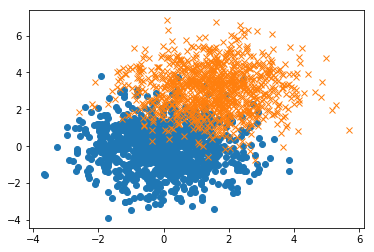

In [5]:
plt.plot(data[:1024, 0], data[:1024, 1], 'o')
plt.plot(data[1024:, 0], data[1024:, 1], 'x')
plt.show()

### 数据预处理


将数据集分割为两部分，一部分用于训练，另一部分用于验证模型。

In [6]:
np.random.shuffle(data)
train = data[0:-128]
test = data[-128:]

定义产生batch的生成器

In [7]:
def gen_batch(dataset): 
    """生成batch"""
    for i in range(len(dataset) // 128):
        pos = i * 128
        x = dataset[pos: pos + 128, 0:2]
        y = dataset[pos: pos + 128, 2]
        yield x, y.reshape(-1, 1)

### 定义计算图
在这一步中，我们主要完成了以下几点：
* 定义 placeholder 用于后面输入数据
* 定义权重变量 W
* 定义损失函数
* 定义优化算法，这里使用的时梯度下降
* 计算错误率

In [8]:
lr = 1e-3
epoch = 1000

In [9]:
# 定义计算图
graph = tf.Graph()
with graph.as_default():
    # 定义placeholder
    X = tf.placeholder(shape=(None, 2), dtype=tf.float32, name="X")
    Y = tf.placeholder(shape=(None, 1), dtype=tf.float32, name="Y")

    # 定义weight matrix
    W = tf.Variable(tf.zeros(shape=[2, 1]), name="WeightMatrix")
    b = tf.Variable(0., name='bias')
    lgt = tf.matmul(X, W) + b
    output = tf.sigmoid(lgt, name="Apply_Sigmoid")
    # 定义loss
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=lgt), name="calculate_loss")
    
    with tf.name_scope("SGD"):
        # 使用梯度下降进行优化
        opt = tf.train.GradientDescentOptimizer(lr).minimize(loss)
    
    # 计算错误率
    with tf.name_scope("calculate_error_rate"):
        # 概率大于 0.5 预测结果为1， 否则为 0
        prediction_result = tf.cast(tf.greater(output, 0.5), dtype=tf.float32)

        error_rate = 1 - tf.reduce_mean(tf.cast(tf.equal(prediction_result, Y), dtype=tf.float32))

### 定义进程并进行运算
这一步将准备好的数据输入给运算图，对模型中的变量赋予了初值，进行计算和优化，总共对模型进行了500次训练，并且训练完成以后利用测试数据集对模型进行了评估。

In [10]:
with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    step = 0
    for epc in range(epoch):
        for x, y in gen_batch(train):
            l, error, _ = sess.run([loss, error_rate, opt], feed_dict={X: x, Y: y})
            if step % 100 == 0:
                print("Step: {:>4}, Loss: {:.4f}, Error Rate: {:.4%}".format(step, l, error))
            step += 1
    print("Training finished.")
    
    x, y = next(gen_batch(test))
    l, error, weight_matrix = sess.run([loss, error_rate, W],
                                       {X: x, Y: y})
    print("Testing Loss: {:.4f}, Testing Error Rate: {:.4%}".format(l, error))
    res = sess.run([W, b])

Step:    0, Loss: 0.6931, Error Rate: 52.3438%
Step:  100, Loss: 0.6330, Error Rate: 27.3438%
Step:  200, Loss: 0.5629, Error Rate: 14.8438%
Step:  300, Loss: 0.5454, Error Rate: 23.4375%
Step:  400, Loss: 0.5387, Error Rate: 26.5625%
Step:  500, Loss: 0.4676, Error Rate: 14.0625%
Step:  600, Loss: 0.4818, Error Rate: 23.4375%
Step:  700, Loss: 0.4967, Error Rate: 25.7812%
Step:  800, Loss: 0.4177, Error Rate: 12.5000%
Step:  900, Loss: 0.4463, Error Rate: 22.6562%
Step: 1000, Loss: 0.4724, Error Rate: 25.0000%
Step: 1100, Loss: 0.3859, Error Rate: 11.7188%
Step: 1200, Loss: 0.4228, Error Rate: 21.8750%
Step: 1300, Loss: 0.4554, Error Rate: 23.4375%
Step: 1400, Loss: 0.3630, Error Rate: 10.9375%
Step: 1500, Loss: 0.4052, Error Rate: 21.0938%
Step: 1600, Loss: 0.4422, Error Rate: 22.6562%
Step: 1700, Loss: 0.3451, Error Rate: 9.3750%
Step: 1800, Loss: 0.3912, Error Rate: 20.3125%
Step: 1900, Loss: 0.4311, Error Rate: 21.0938%
Step: 2000, Loss: 0.3304, Error Rate: 9.3750%
Step: 2100, Los

In [19]:
res

[array([[0.53196734],
        [1.077772  ]], dtype=float32), -1.4537041]

In [20]:
def func(x, w1, w2, b):
    return (-b - w1 * x) / w2

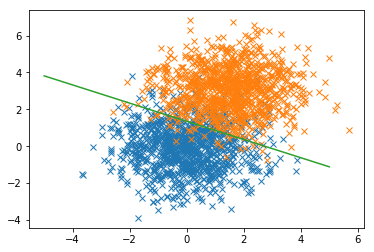

In [21]:
with open('./logistic_regression.pkl', 'rb') as f:
    data = pickle.load(f)
line_space = np.linspace(-5, 5, 1024)
plt.plot(data[:1024, 0], data[:1024, 1], 'x')
plt.plot(data[1024:, 0], data[1024:, 1], 'x')
plt.plot(line_space, list(map(lambda x: func(x, res[0][0], res[0][1], res[1]), line_space)))
plt.show()